<a href="https://colab.research.google.com/github/enesertas/computer_vision_step_by_step/blob/main/cnn_for_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
data = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

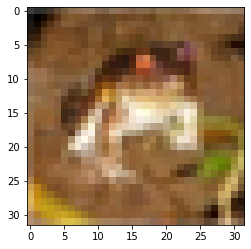

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_test_cat = to_categorical(y_test, 10)
y_train_cat = to_categorical(y_train, 10)

In [ ]:
y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras import Model

In [ ]:
model = Sequential()

i = Input(shape=(32,32,3))
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5050 - accuracy: 0.4557 - val_loss: 1.2368 - val_accuracy: 0.5558
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1634 - accuracy: 0.5847 - val_loss: 1.0279 - val_accuracy: 0.6310
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0037 - accuracy: 0.6462 - val_loss: 0.9808 - val_accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8899 - accuracy: 0.6852 - val_loss: 0.9184 - val_accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7892 - accuracy: 0.7228 - val_loss: 0.9096 - val_accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7062 - accuracy: 0.7506 - val_loss: 0.8803 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6280 - accuracy: 0.7776 - val_loss: 0.8838 -

Text(0.5, 1.0, 'Model Loss')

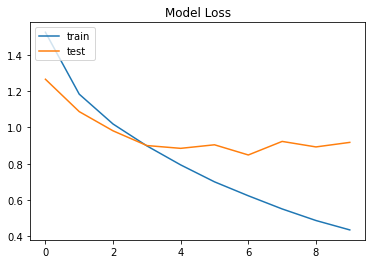

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('Model Loss')

Text(0.5, 1.0, 'Model Accuracy')

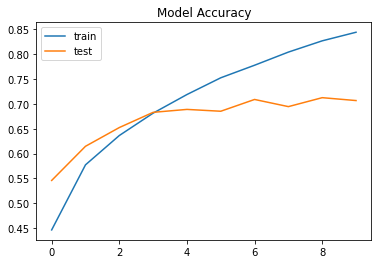

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('Model Accuracy')

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.89      0.76      0.82      1000
           2       0.58      0.67      0.62      1000
           3       0.48      0.56      0.52      1000
           4       0.68      0.64      0.66      1000
           5       0.62      0.59      0.60      1000
           6       0.79      0.77      0.78      1000
           7       0.78      0.75      0.77      1000
           8       0.79      0.85      0.82      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[666  11  92  24  26   5   8  10 106  52]
 [ 14 760   8  10   4   9  13   8  35 139]
 [ 39   4 668  70  64  62  39  31  18   5]
 [ 16   5  91 558  60 150  53  31  17  19]
 [ 14   2 100  98 643  36  39  57   8   3]
 [ 14   4  63 206  42 590  26  44   5   6]
 [  3   3  55  87  37  25 767  12   5   6]
 [  7   1  43  56  60  58   8 754   4   9]
 [ 30  18  18  22   7  12   7   2 855  29]
 [ 18  48  12  29   8   9  15  20  35 806]]


airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck

In [ ]:
import seaborn as sns

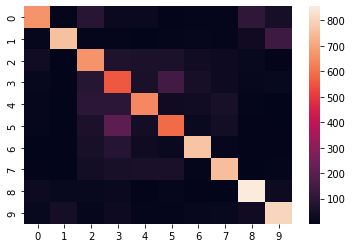

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions))

Looks like our model confuses class 3 with class 5 the most and those classes appear to be cats and dogs which are expected to be similar when working with 32 by 32 pixels.